In [3]:
# install.packages('MultiKink')

In [4]:
#libraries that we will need
#install.packages("MultiKink")  
library(MultiKink) #for the data
library(ggplot2)   #for the plots
set.seed(1974)     #fix the random generator seed 

data("triceps")   #load the dataset triceps
                  #notice that the variable of interest
                  #it is also called tricets. Don't get 
                  #confused!

Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numericVector" of class "Mnumeric"; definition not updated”


In [11]:
# Make plot wider
options(repr.plot.width=15, repr.plot.height=8)

In [6]:
head(triceps)

,age,lntriceps,triceps
,<dbl>,<dbl>,<dbl>
1,12.05,1.223776,3.4
2,9.91,1.386294,4.0
3,10.04,1.435084,4.2
4,11.49,1.435084,4.2
5,10.12,1.481605,4.4
6,11.87,1.481605,4.4


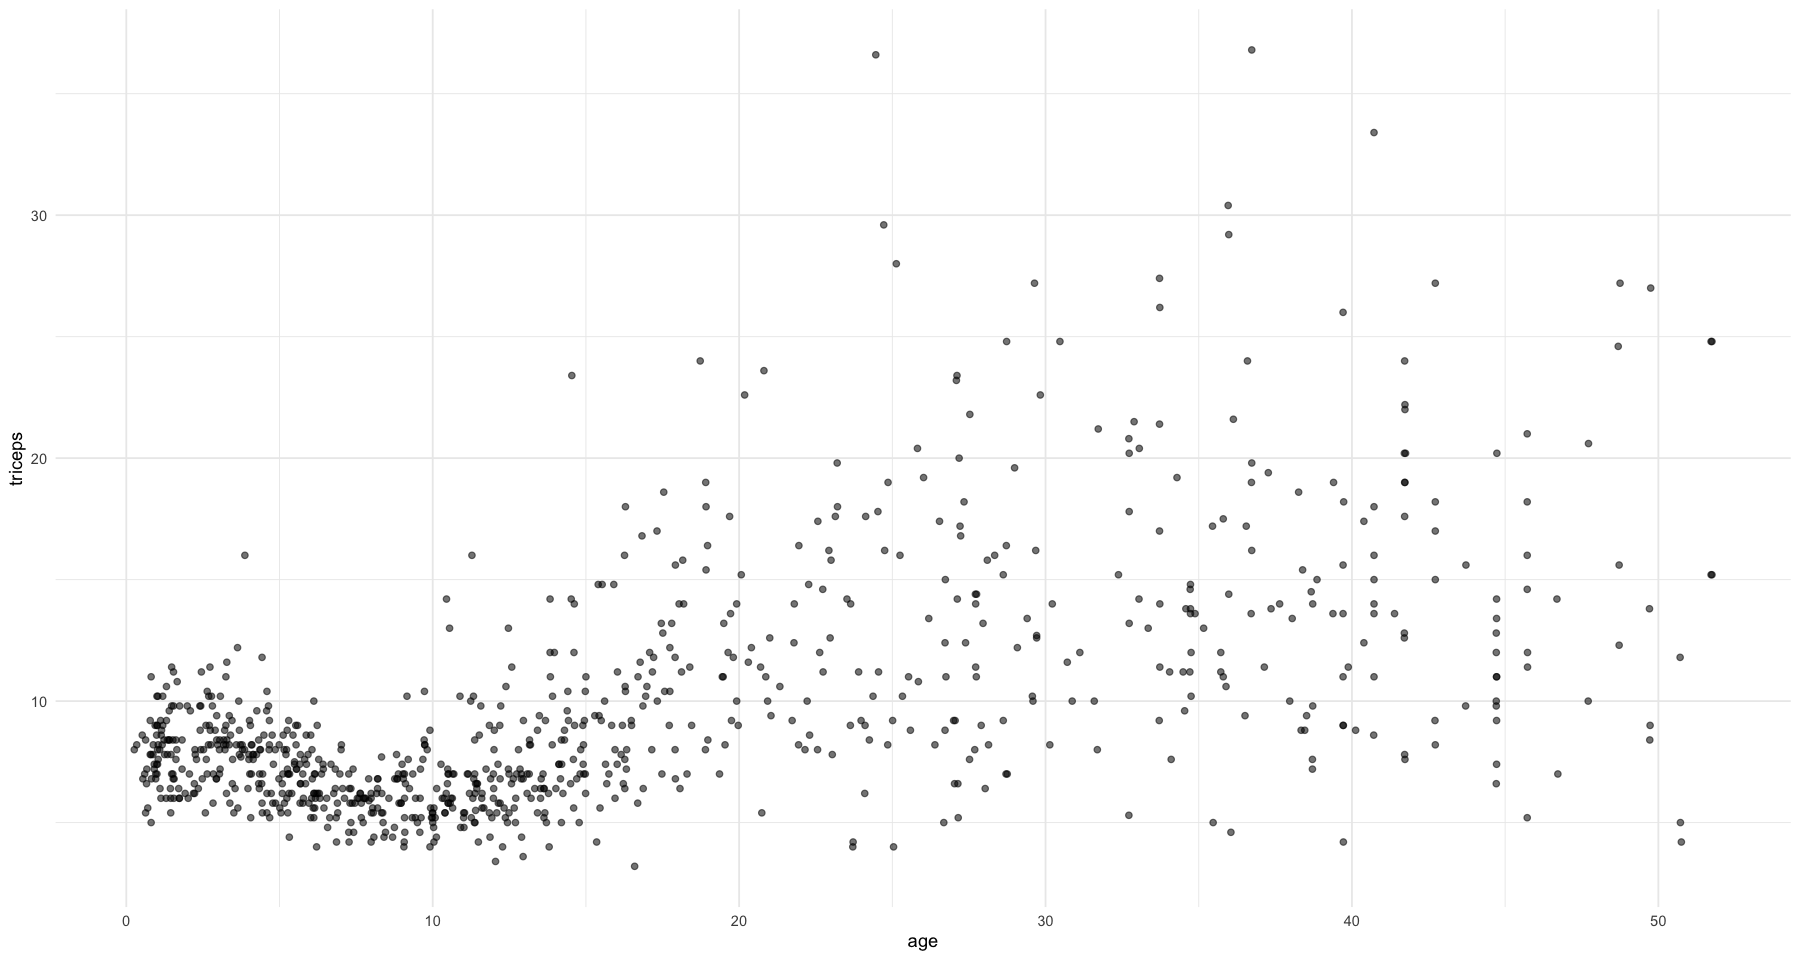

In [17]:
 #simple scatter
  #we can store the scatter in an object 
  #to use it later
 tri.age.plot <- ggplot(triceps, aes(x=age, y=triceps)) +
                 geom_point(alpha=0.55, color="black") + 
                 theme_minimal() 
 tri.age.plot

In [13]:
###Piecewise regression

pred1 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age<5,]))
pred2 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age >=5 & triceps$age<10,]))
pred3 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age>=10 & triceps$age<20,]))
pred4 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age>=20 & triceps$age<30,]))
pred5 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age>=30 & triceps$age<40,]))
pred6 <- predict(lm(triceps~age, 
                    data = triceps[triceps$age>=40,]))

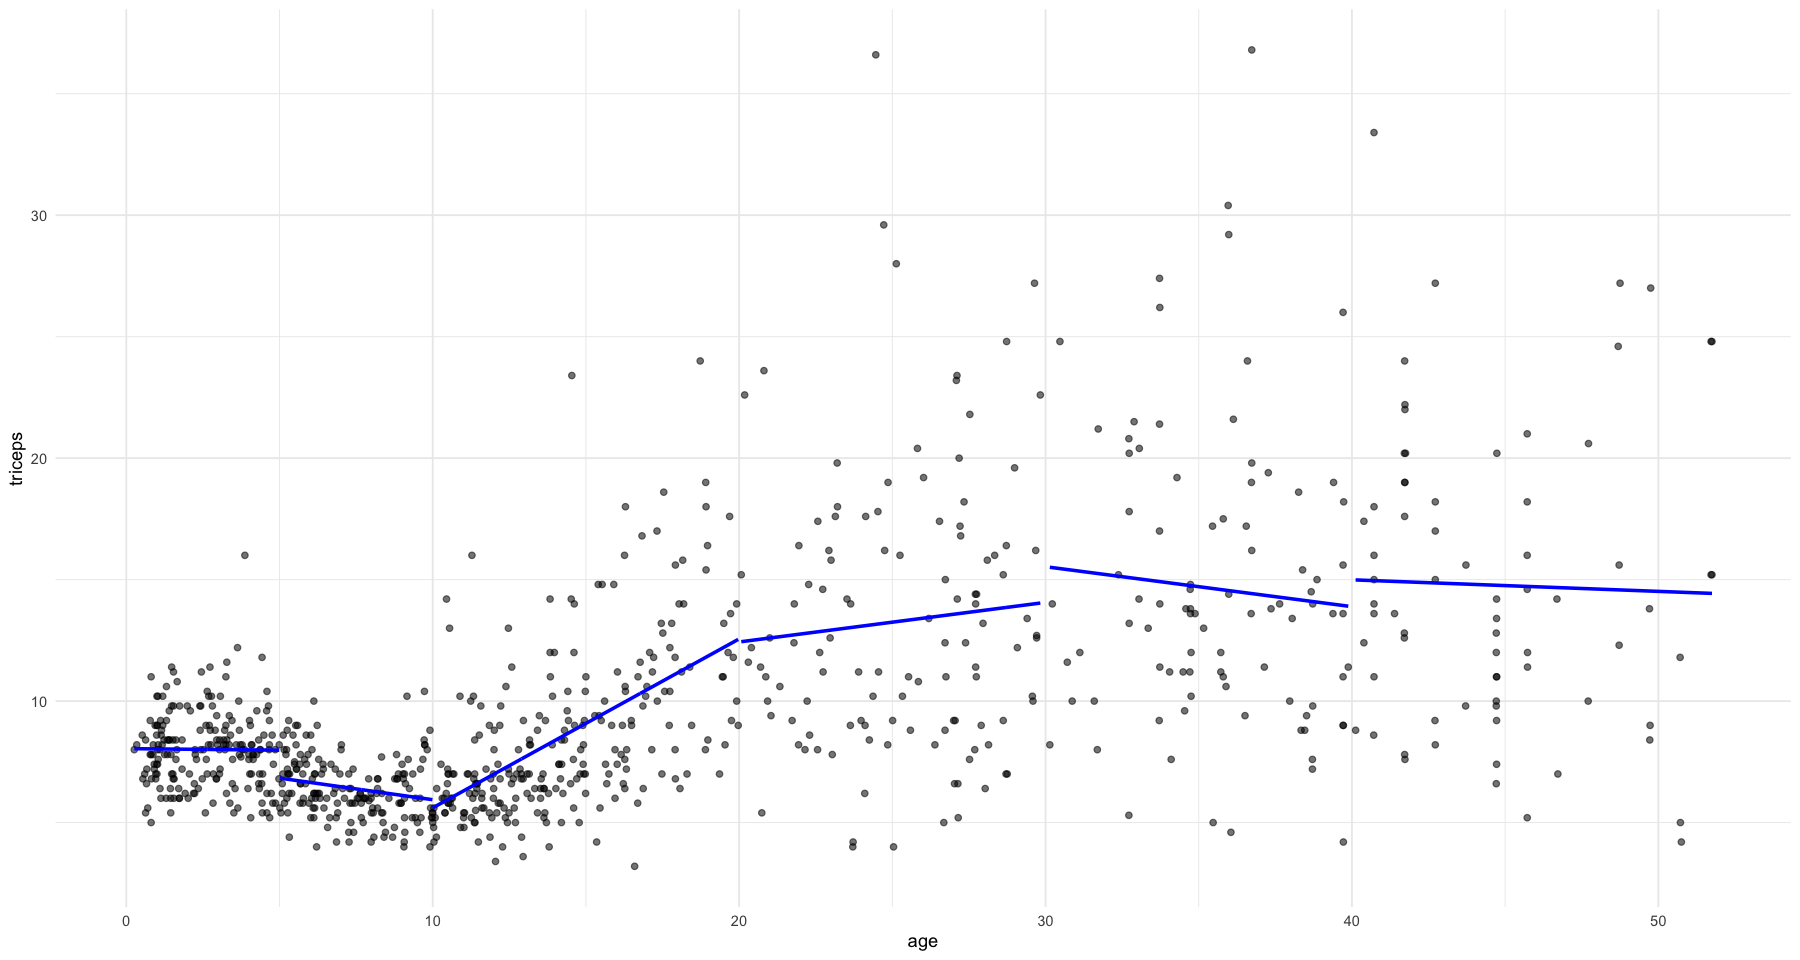

In [24]:
tri.age.plot + 
  geom_line(data=triceps[triceps$age<5,], 
            aes(y = pred1, x=age), size = 1, col="blue") +
  geom_line(data=triceps[triceps$age >=5 & triceps$age<10,], 
            aes(y = pred2, x=age), size = 1, col="blue") +
  geom_line(data=triceps[triceps$age>=10 & triceps$age<20,], 
            aes(y = pred3, x=age), size = 1, col="blue") +
  geom_line(data=triceps[triceps$age>=20 & triceps$age<30,], 
            aes(y = pred4, x=age), size = 1, col="blue") +
  geom_line(data=triceps[triceps$age>=30 & triceps$age<40,], 
            aes(y = pred5, x=age), size = 1, col="blue") +
  geom_line(data=triceps[triceps$age>=40,], 
            aes(y = pred6, x=age), size = 1, col="blue") 

In [25]:
pred7 <- predict(lm(triceps~ age + I((age-5)*(age>=5)) +
                                   I((age-10)*(age >= 10)) +
                                   I((age-20)*(age >= 20)) +
                                   I((age-30)*(age >= 30)) +
                                  I((age-40)*(age >= 40)),
                    data = triceps))

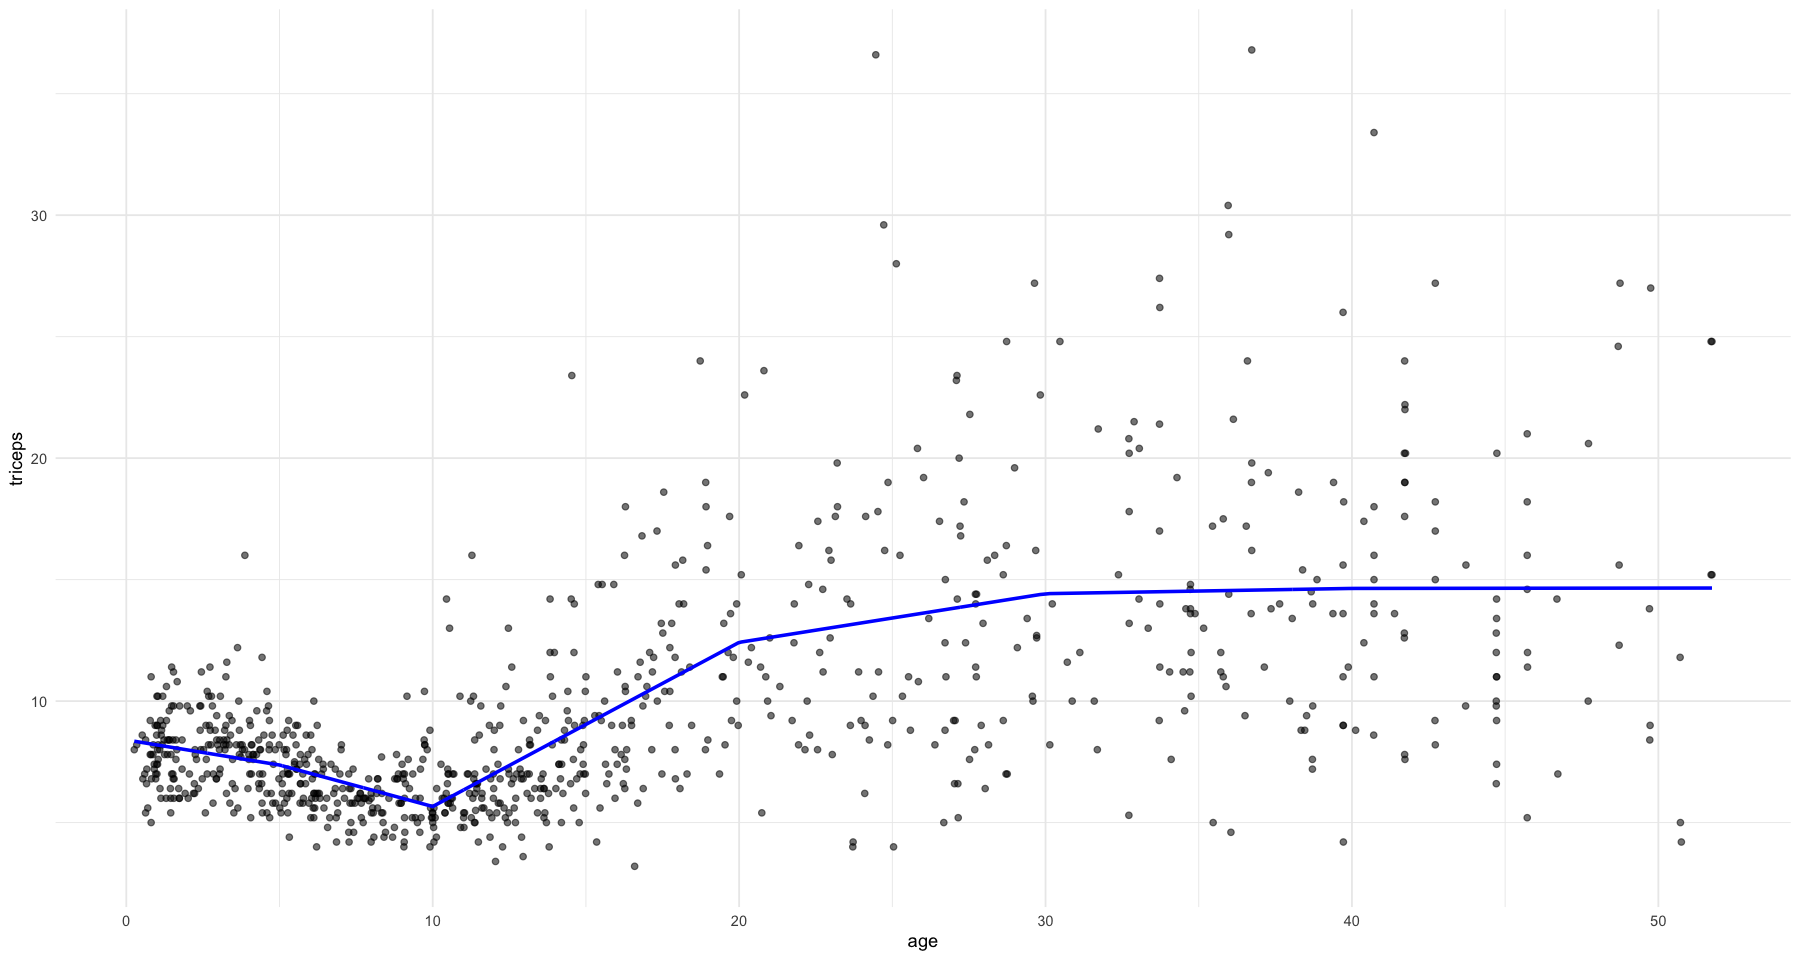

In [26]:
tri.age.plot +
  geom_line(data=triceps, 
            aes(y = pred7, x=age), size = 1, col="blue") 

Using the same knots as above, fit a quadratic piecewise regression


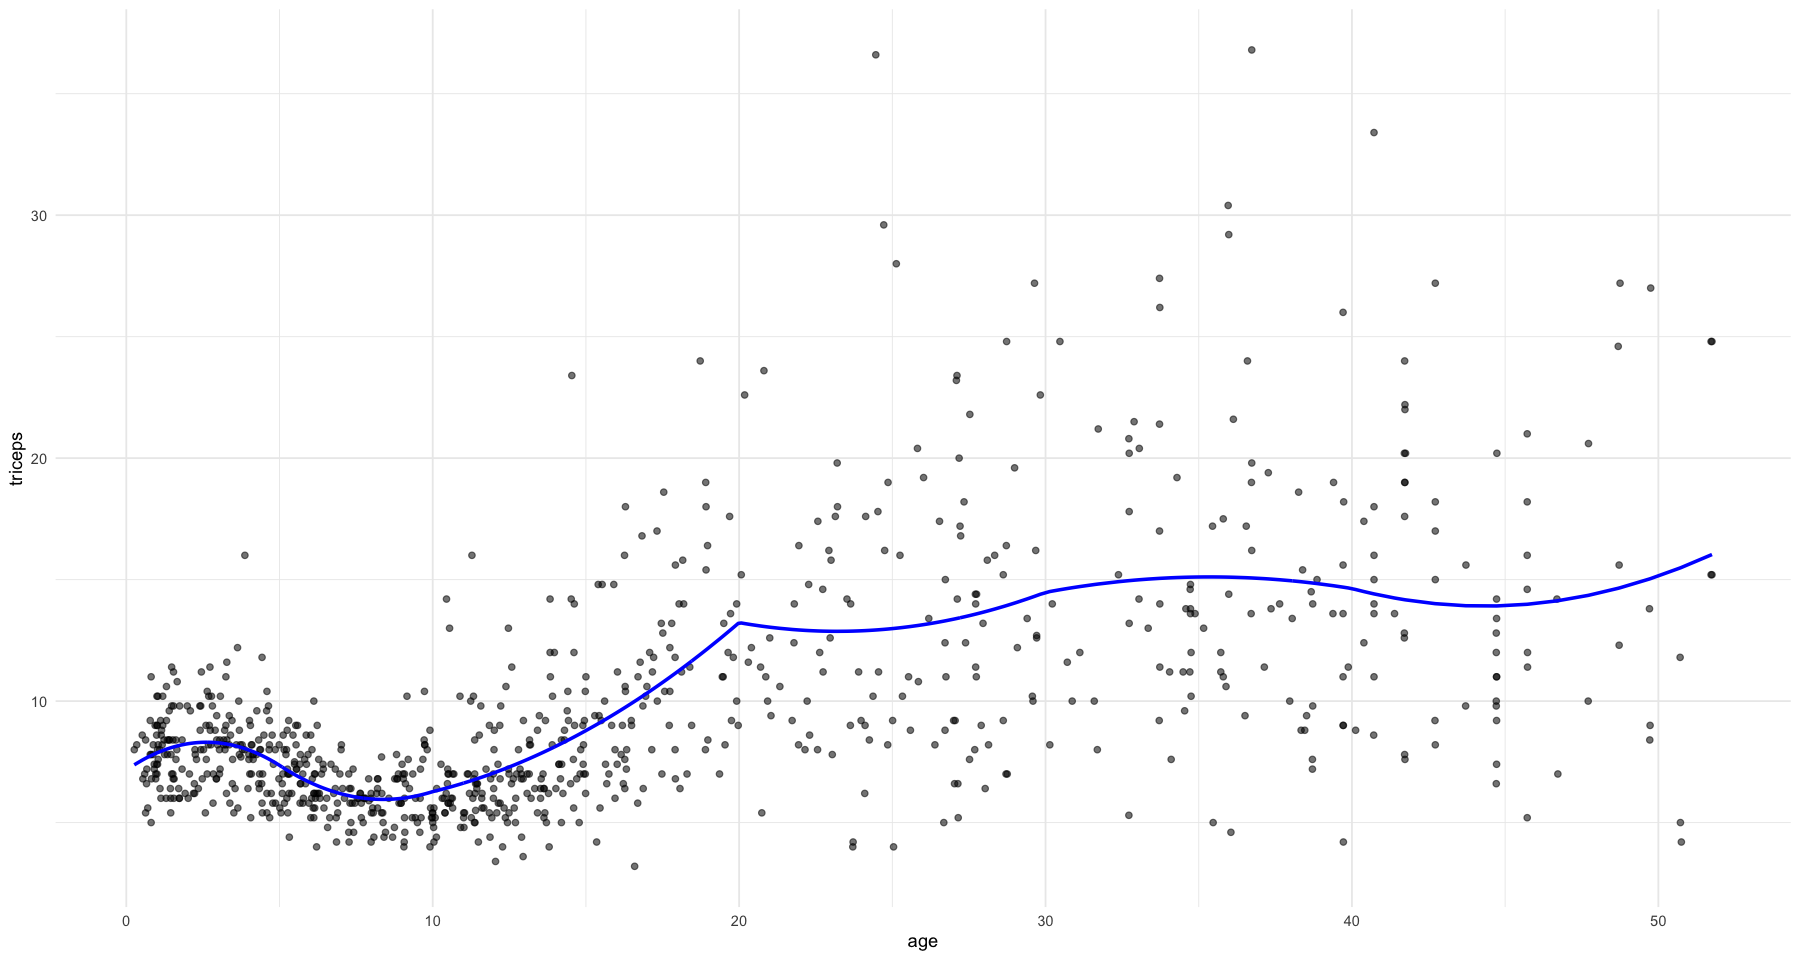

In [29]:
 pred.quad <- predict(lm(triceps~ age + I(age^2) + 
                    I((age-5)*(age>=5)) + I((age-5)^2*(age>=5)) +
                    I((age-10)*(age >= 10)) + I((age-10)^2*(age>=10)) +
                    I((age-20)*(age >= 20)) + I((age-20)^2*(age>=20)) +
                    I((age-30)*(age >= 30)) + I((age-30)^2*(age>=30)) +
                    I((age-40)*(age >= 40)) + I((age-40)^2*(age>=40)),
                    data = triceps))

tri.age.plot +
  geom_line(data=triceps, 
            aes(y = pred.quad, x=age), size = 1, col="blue") 